In [1]:
import pandas as pd
from f01_import import m00_base_functions as bf

# User Inputs

In [2]:
reload_intermediary = True
grid_size = 3
input_position = [200,50,0]

# Define Functions

#### Import of new Grasshopper simulations (not necessary if reload_intermediary = True)

In [3]:
def import_sun():
    from f01_import import m01_import_sunlight_hours as m01
    from f01_import import m04_import_base_case as m04
    df_sunlight_hours = m01.import_sunlight_hours(r'f01_import/raw_data/sunlight_hours/', r'f01_import/raw_data/points.csv')
    df_sunlight_hours.name = 'df_sunlight_hours'
    df_global_sunlight = m04.import_base_case(r'f01_import/raw_data/sunlight_hours_base/',  r'f01_import/raw_data/points_base.csv')
    df_global_sunlight.name = 'df_global_sunlight'
    for df in df_sunlight_hours, df_global_sunlight:
        df.to_pickle('f01_import/intermediary_data/{}.store'.format(df.name))
    return df_sunlight_hours, df_global_sunlight

#### Shading simulation, here additional objects can be input

In [4]:
def simulate_shade():
    from f02_simulate import m01_move as m01
    df_combined_sunlight = m01.move_individual(df_global_sunlight, df_sunlight_hours, input_position[0], input_position[1], input_position[2], 'sunlight',dimensions, grid_size)
    #input_position_second = [160, 25,0]
    #df_combined_sunlight = m01.move_individual(df_global_sunlight, df_sunlight_hours, input_position_second[0], input_position_second[1], input_position_second[2], 'sunlight',dimensions, grid_size)
    return df_combined_sunlight

#### Define visualization, 0 = Intersection height - can be changed to full factor of gridsize for higher intersection

In [5]:
def intersect():
    from f03_intersect import m01_horizontal as m01
    df_cut = m01.horizontal(df_global_sunlight, 0, 'sum', 'Sunlight')

# Import Preprocessed data

In [6]:
dimensions = bf.read_dimensions(r'f01_import/raw_data/dimensions')
if reload_intermediary:
    df_sunlight_hours, df_global_sunlight = [pd.read_pickle('f01_import/intermediary_data/{}.store'.format(name))
                                         for name in['df_sunlight_hours', 'df_global_sunlight']]
else:
    df_sunlight_hours, df_global_sunlight = import_sun()    

# Shading simulation

In [7]:
df_global_sunlight = simulate_shade()

# Visualization

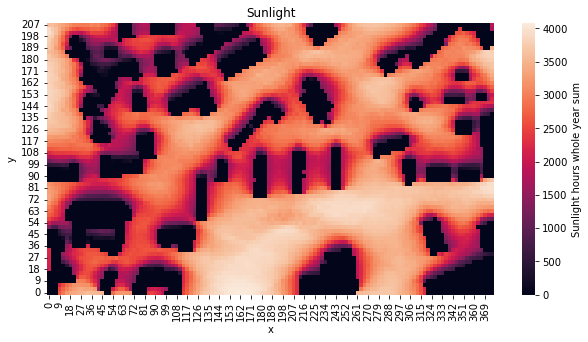

In [8]:
df_cut = intersect()